In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, learning_curve

In [0]:
dataset = pd.read_csv('../datasets/Dataset_3Cluster_4features.csv')

In [3]:
dataset.head()

,V1,V2,V3,V4,V5
0,0.762550,0.843568,0.836821,0.904889,1
1,0.760337,0.961476,0.760661,0.757853,1
2,0.764597,0.796654,0.756289,0.850313,1
3,0.692830,0.722283,0.703194,0.702109,1
4,0.848631,0.886957,0.859482,0.702199,1


In [21]:
dataset.describe()

,V1,V2,V3,V4,V5
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.566286,0.464751,0.530167,0.638497,2.000000
std,0.230186,0.261773,0.223961,0.246811,0.817861
min,0.084595,-0.027355,0.093054,0.095571,1.000000
25%,0.343922,0.261674,0.342785,0.376390,1.000000
50%,0.595929,0.356967,0.503191,0.728667,2.000000
75%,0.760409,0.736215,0.726713,0.841539,3.000000
max,1.144656,1.020722,1.057730,1.077222,3.000000


In [0]:
X = dataset.drop(columns='V5').values
Y = dataset[['V5']].values.ravel()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

## SKLearn

In [0]:
from sklearn.neural_network import MLPClassifier

0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


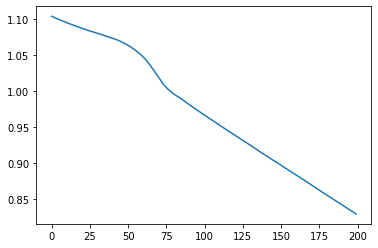

In [78]:
clf1 = MLPClassifier(hidden_layer_sizes=(2), random_state=42)
clf1.fit(X_train, Y_train)
print(clf1.score(X_test, Y_test))
plt.plot(clf1.loss_curve_)

0.9866666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


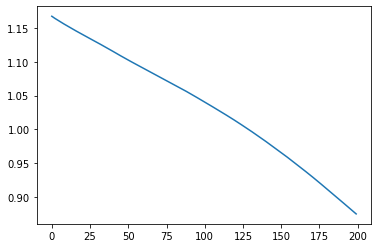

In [79]:
clf2 = MLPClassifier(hidden_layer_sizes=(7), random_state=42)
clf2.fit(X_train, Y_train)
print(clf2.score(X_test, Y_test))
plt.plot(clf2.loss_curve_)

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


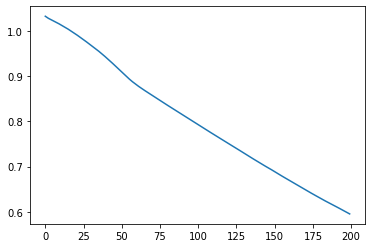

In [80]:
clf3 = MLPClassifier(hidden_layer_sizes=(8), random_state=42)
clf3.fit(X_train, Y_train)
print(clf3.score(X_test, Y_test))
plt.plot(clf3.loss_curve_)

1.0


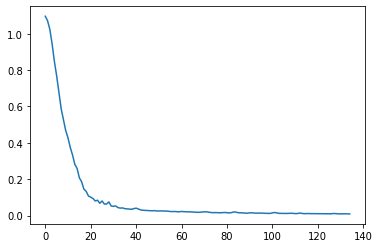

In [81]:
clf4 = MLPClassifier(hidden_layer_sizes=(2), learning_rate_init=0.1, random_state=42)
clf4.fit(X_train, Y_train)
print(clf4.score(X_test, Y_test))
plt.plot(clf4.loss_curve_)

## Keras

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

75/75 [==============================] - 0s 2ms/sample - loss: 1.3737 - acc: 0.2933
0.29333332


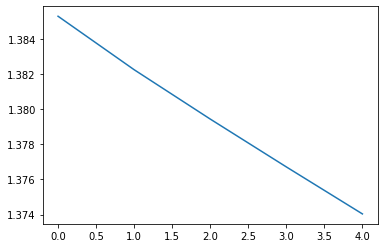

In [132]:
model1 = Sequential()
model1.add(Dense(2, activation='relu', input_dim=X.shape[1]),)
model1.add(Dense(4, activation='softmax'))

optimizer = Adam()
model1.compile(optimizer, 'categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, to_categorical(Y_train), 32, 5, validation_split=0, shuffle=False, verbose=0)
score = model1.evaluate(X_test, to_categorical(Y_test), batch_size=128)
print(score[1])
plt.plot(history.history['loss'])

75/75 [==============================] - 0s 2ms/sample - loss: 1.3872 - acc: 0.2533
0.25333333


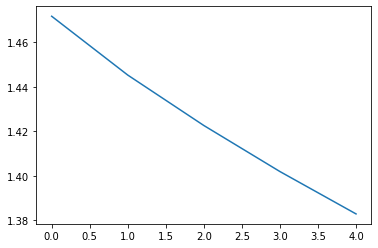

In [134]:
model1 = Sequential()
model1.add(Dense(7, activation='relu', input_dim=X.shape[1]),)
model1.add(Dense(4, activation='softmax'))

optimizer = Adam()
model1.compile(optimizer, 'categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, to_categorical(Y_train), 32, 5, validation_split=0, shuffle=False, verbose=0)
score = model1.evaluate(X_test, to_categorical(Y_test), batch_size=128)
print(score[1])
plt.plot(history.history['loss'])

75/75 [==============================] - 0s 2ms/sample - loss: 1.3893 - acc: 0.3067
0.30666667


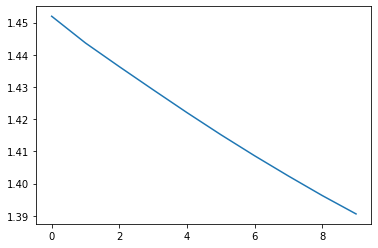

In [137]:
model1 = Sequential()
model1.add(Dense(2, activation='relu', input_dim=X.shape[1]),)
model1.add(Dense(4, activation='softmax'))

optimizer = Adam()
model1.compile(optimizer, 'categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, to_categorical(Y_train), 32, 10, validation_split=0, shuffle=False, verbose=0)
score = model1.evaluate(X_test, to_categorical(Y_test), batch_size=128)
print(score[1])
plt.plot(history.history['loss'])

75/75 [==============================] - 0s 2ms/sample - loss: 0.6782 - acc: 0.7067
0.70666665


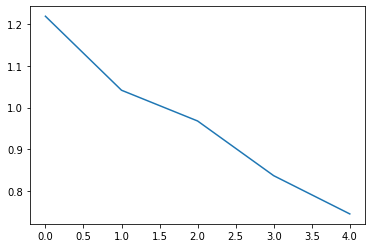

In [138]:
model1 = Sequential()
model1.add(Dense(2, activation='relu', input_dim=X.shape[1]),)
model1.add(Dense(4, activation='softmax'))

optimizer = Adam(lr=0.1)
model1.compile(optimizer, 'categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, to_categorical(Y_train), 32, 5, validation_split=0, shuffle=False, verbose=0)
score = model1.evaluate(X_test, to_categorical(Y_test), batch_size=128)
print(score[1])
plt.plot(history.history['loss'])

75/75 [==============================] - 0s 2ms/sample - loss: 0.4544 - acc: 0.8933
0.8933333


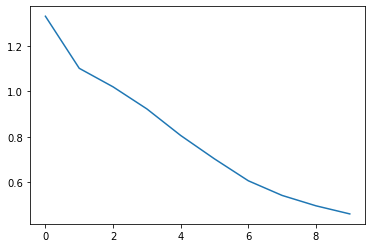

In [140]:
model1 = Sequential()
model1.add(Dense(2, activation='relu', input_dim=X.shape[1]),)
model1.add(Dense(4, activation='softmax'))

optimizer = Adam(lr=0.1)
model1.compile(optimizer, 'categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, to_categorical(Y_train), 32, 10, validation_split=0, shuffle=False, verbose=0)
score = model1.evaluate(X_test, to_categorical(Y_test), batch_size=128)
print(score[1])
plt.plot(history.history['loss'])

75/75 [==============================] - 0s 3ms/sample - loss: 0.1684 - acc: 1.0000
1.0


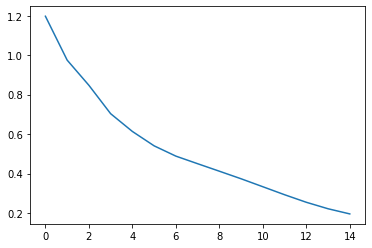

In [143]:
model1 = Sequential()
model1.add(Dense(2, activation='relu', input_dim=X.shape[1]),)
model1.add(Dense(4, activation='softmax'))

optimizer = Adam(lr=0.1)
model1.compile(optimizer, 'categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, to_categorical(Y_train), 32, 15, validation_split=0, shuffle=False, verbose=0)
score = model1.evaluate(X_test, to_categorical(Y_test), batch_size=128)
print(score[1])
plt.plot(history.history['loss'])